In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as pltn
import random
import copy
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
seed_value=46

In [2]:
%run "C:\Users\nharr\Downloads\CS 333 Technical Demo.ipynb"

In [3]:
%run generate_colorado.py

In [4]:
graph = get_colorado_graph(edge_path = "county.csv", node_path = "data_by_county.csv")
test_index = 10
node = graph.nodes()[test_index]
print(node["population"])

9355


In [5]:
def get_node_numbers_and_names(graph):
    node_info_list = [(node_number, node_data['name']) for node_number, node_data in graph.nodes(data=True)]
    return node_info_list

# Assuming you have the graph loaded already
colorado_graph = get_colorado_graph(edge_path="county.csv", node_path="data_by_county.csv")

# Call the function to get node numbers and names
node_info_list = get_node_numbers_and_names(colorado_graph)

# Print the list of node numbers and names
for node_info in node_info_list:
    print(node_info)

(0, 'Adams')
(1, 'Alamosa')
(2, 'Arapahoe')
(3, 'Archuleta')
(4, 'Baca')
(5, 'Bent')
(6, 'Boulder')
(7, 'Broomfield')
(8, 'Chaffee')
(9, 'Cheyenne')
(10, 'Clear Creek')
(11, 'Conejos')
(12, 'Costilla')
(13, 'Crowley')
(14, 'Custer')
(15, 'Delta')
(16, 'Denver')
(17, 'Dolores')
(18, 'Douglas')
(19, 'Eagle')
(20, 'El Paso')
(21, 'Elbert')
(22, 'Fremont')
(23, 'Garfield')
(24, 'Gilpin')
(25, 'Grand')
(26, 'Gunnison')
(27, 'Hinsdale')
(28, 'Huerfano')
(29, 'Jackson')
(30, 'Jefferson')
(31, 'Kiowa')
(32, 'Kit Carson')
(33, 'La Plata')
(34, 'Lake')
(35, 'Larimer')
(36, 'Las Animas')
(37, 'Lincoln')
(38, 'Logan')
(39, 'Mesa')
(40, 'Mineral')
(41, 'Moffat')
(42, 'Montezuma')
(43, 'Montrose')
(44, 'Morgan')
(45, 'Otero')
(46, 'Ouray')
(47, 'Park')
(48, 'Phillips')
(49, 'Pitkin')
(50, 'Prowers')
(51, 'Pueblo')
(52, 'Rio Blanco')
(53, 'Rio Grande')
(54, 'Routt')
(55, 'Saguache')
(56, 'San Juan')
(57, 'San Miguel')
(58, 'Sedgwick')
(59, 'Summit')
(60, 'Teller')
(61, 'Washington')
(62, 'Weld')
(63,

In [6]:
def add_attributes_to_graph(graph):
    for node_id, node_data in graph.nodes(data=True):
        attributes = node_data
        graph.nodes[node_id].update(attributes)
# Call the function to add attributes
add_attributes_to_graph(colorado_graph)

# Now you can access the 'population' attribute directly
test_index = 10
population = colorado_graph.nodes[test_index]['PVI']
print(population)

4


In [21]:
def visualize_subgraphs2(graph, subgraphs, highlighted_edge="none"):
    pos = nx.spring_layout(graph, seed=seed_value)  # You can use a different layout if you prefer

    # Draw the original graph
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightgray', edge_color='gray', node_size=700)

    # Draw each subgraph with a different color
    for i, subgraph in enumerate(subgraphs, start=1):
        nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_color=f'C{i}', edge_color=f'C{i}', node_size=700)

    # Highlight the specified edge if it's not "none"
    if highlighted_edge != "none":
        nx.draw_networkx_edges(graph, pos, edgelist=[highlighted_edge], edge_color='purple', width=2)

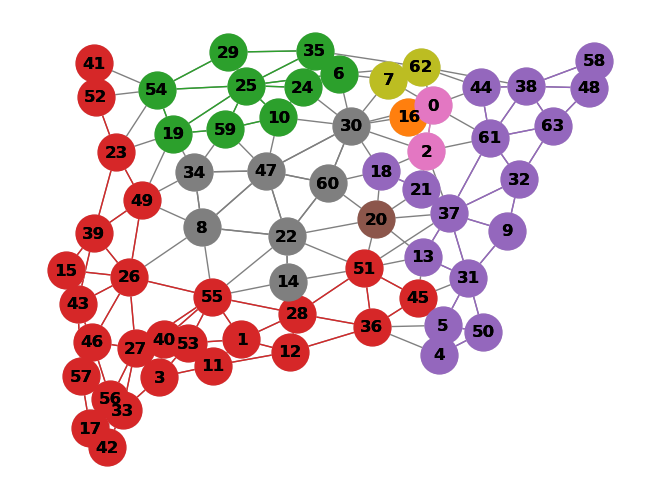

In [22]:
colorado_graph=get_colorado_graph(edge_path = "county.csv", node_path = "data_by_county.csv")
# Manually create subgraphs to intialize to current districting
subgraph_nodes_list = [
    [16],
    [29,54,35,25,59,10,24,6,19],[41,52,23,39,49,15,26,43,57,46,17,56,55,27,42,33,53,3,33,40,1,11,12,28,51,45,36],[9,44,38,58,48,61,63,18,21,37,32,13,31,5,50,4],[20],[0,2],[30,34,47,8,22,14,60],[7,62]
    # Add more subgraphs as needed
]

colorado_subgraphs = []

# Create subgraphs and add them to the list
for subgraph_nodes in subgraph_nodes_list:
    subgraph = colorado_graph.subgraph(subgraph_nodes)
    colorado_subgraphs.append(subgraph)
visualize_subgraphs2(colorado_graph,colorado_subgraphs)

In [23]:
total_population=calculate_total_population(colorado_graph)
print(total_population)

5839926


In [31]:
c_pop=.000000005
def populationscore(graph,subgraphs):
    totalsum=0
    districtaverage=total_population/len(subgraphs)
    for i, subgraph in enumerate(subgraphs, start=1):
        # Calculate the sum of populations for each subgraph
        population_sum = sum(graph.nodes[node]['population'] for node in subgraph.nodes)
        totalsum+=(population_sum-districtaverage)**2
    return(c_pop*totalsum)
populationscore(colorado_graph,colorado_subgraphs)

1779.5140037775

In [100]:
c_pvi=0.00003
def PVIscore(graph, subgraphs):
    total_score = 0

    for subgraph in subgraphs:
        # Calculate the sum of PVI scores for each subgraph
        pvi_sum = sum(graph.nodes[node]['PVI']*graph.nodes[node]['population'] for node in subgraph.nodes)
        total_score += abs(pvi_sum)

    return c_pvi * total_score
PVIscore(colorado_graph,colorado_subgraphs)

1804.51926

In [101]:
lambda_J=1
def totalscorefunction(graph,subgraph):
    return lambda_J*populationscore(graph,subgraph)+(1-lambda_J)*PVIscore(graph,subgraph)

In [102]:
import matplotlib.pyplot as plt

def visualize_subgraphs3(graph, subgraphs, highlighted_edge="none"):
    pos = nx.spring_layout(graph, seed=seed_value)

    # Draw the original graph
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightgray', edge_color='gray', node_size=700)

    # Draw each subgraph with a different color
    for i, subgraph in enumerate(subgraphs, start=1):
        nx.draw(subgraph, pos, with_labels=True, font_weight='bold', node_color=f'C{i}', edge_color=f'C{i}', node_size=700)

    # Highlight the specified edge if it's not "none"
    if highlighted_edge != "none":
        nx.draw_networkx_edges(graph, pos, edgelist=[highlighted_edge], edge_color='purple', width=2)

    # Add text annotations in the bottom right corner
    pop_score_text = f'Pop Score: {populationscore(graph, subgraphs)}'
    pvi_score_text = f'PVI Score: {PVIscore(graph, subgraphs)}'
    plt.text(0.8, 0.1, pop_score_text, transform=plt.gca().transAxes, fontsize=10, color='black')
    plt.text(0.8, 0.05, pvi_score_text, transform=plt.gca().transAxes, fontsize=10, color='black')

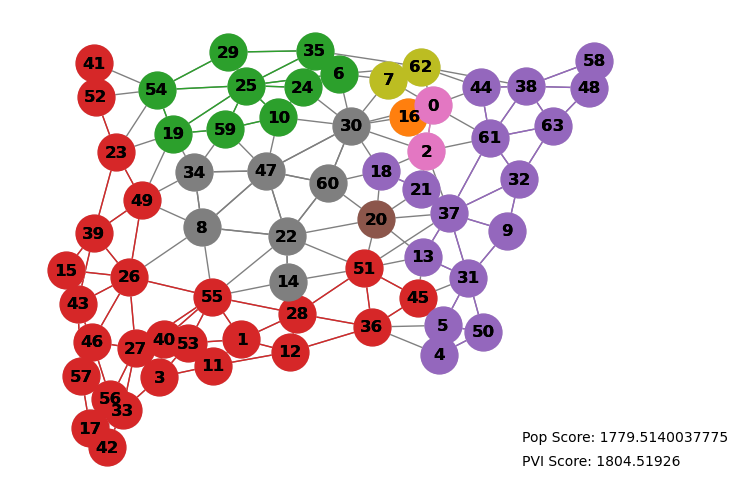

In [103]:
visualize_subgraphs3(colorado_graph,colorado_subgraphs)

In [104]:
def are_subgraphs_connected(graph, subgraphs):
    for subgraph in subgraphs:
        if not nx.is_connected(graph.subgraph(subgraph.nodes())):
            return False
    return True
print(are_subgraphs_connected(colorado_graph,colorado_subgraphs))

True


In [105]:
def are_subgraphs_nonempty(subgraphs):
    return all(len(subgraph) > 0 for subgraph in subgraphs)

In [106]:
populationscore(colorado_graph,colorado_subgraphs)

1779.5140037775

In [140]:
beta=0.08
import numpy as np

#Note that this is not the correct MCMC implementation

def one_iteration_of_MCMC_here(graph, subgraphs):
    con1 = len(get_edges_between_subgraphs(graph, subgraphs))
    conflicted_edge = get_random_edge_between_subgraphs(graph, subgraphs)
    
    while True:
        proposed_graph, proposed_subgraphs = create_proposed_state(graph, subgraphs, conflicted_edge)
    
        # Check if all proposed subgraphs are non-empty
        if are_subgraphs_nonempty(proposed_subgraphs):
        # Check if the proposed subgraph is connected
            if are_subgraphs_connected(proposed_graph, proposed_subgraphs):
                break  # Exit the loop if connected

    # If not connected or non-empty, generate a different conflicted edge and try again
        conflicted_edge = get_random_edge_between_subgraphs(graph, subgraphs)

    con2 = len(get_edges_between_subgraphs(proposed_graph, proposed_subgraphs))
    probfromscorefunctions = np.exp(-1 * beta * (totalscorefunction(proposed_graph, proposed_subgraphs) - totalscorefunction(graph, subgraphs))) 
    transitionprobability = min(1, con1 / con2, probfromscorefunctions)

    # Generate a random number between 0 and 1
    random_number = np.random.rand()

    # Check if the random number is less than the transition probability
    if random_number < transitionprobability:
        return proposed_graph, proposed_subgraphs
    else:
        return graph, subgraphs

<class 'list'>
Graph with 12 nodes and 13 edges
543.1285700475
1548.33846
[(16, 2), (16, 0), (16, 30), (8, 22), (8, 26), (8, 55), (47, 22), (49, 23), (49, 26), (49, 39), (19, 23), (54, 23), (54, 41), (54, 52), (10, 30), (47, 30), (47, 60), (24, 30), (35, 6), (35, 62), (24, 6), (25, 6), (4, 50), (5, 31), (5, 50), (45, 13), (45, 31), (51, 13), (51, 37), (22, 20), (51, 20), (22, 60), (2, 21), (37, 20), (37, 21), (13, 20), (2, 0), (44, 0), (61, 0), (2, 18), (2, 30), (38, 62), (44, 62), (20, 18), (20, 60), (21, 18), (0, 30), (7, 30), (0, 62), (7, 6), (7, 62), (30, 6)]


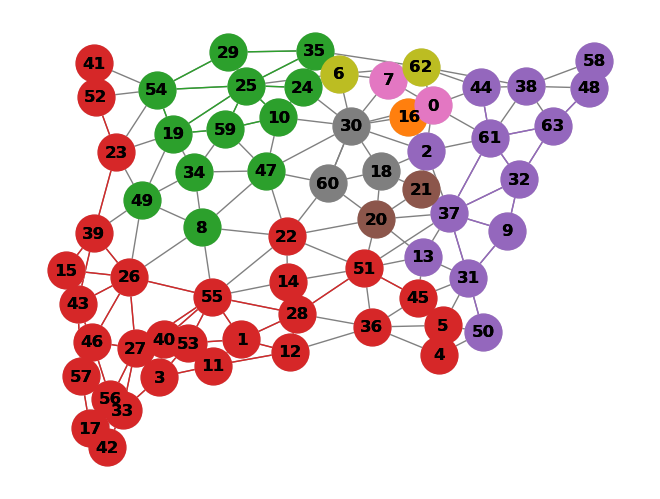

In [148]:
num_iterations=70
graph1=colorado_graph
subgraphs1=colorado_subgraphs
print(type(subgraphs1))
for _ in range(num_iterations):
        # Call one_iteration_of_MCMC for each iteration
        graph1,subgraphs1=one_iteration_of_MCMC_here(graph1,subgraphs1)
visualize_subgraphs2(graph1,subgraphs1)
print(subgraphs1[1])
print(populationscore(graph1,subgraphs1))
print(PVIscore(graph1,subgraphs1))
print(get_edges_between_subgraphs(graph1,subgraphs1))

True

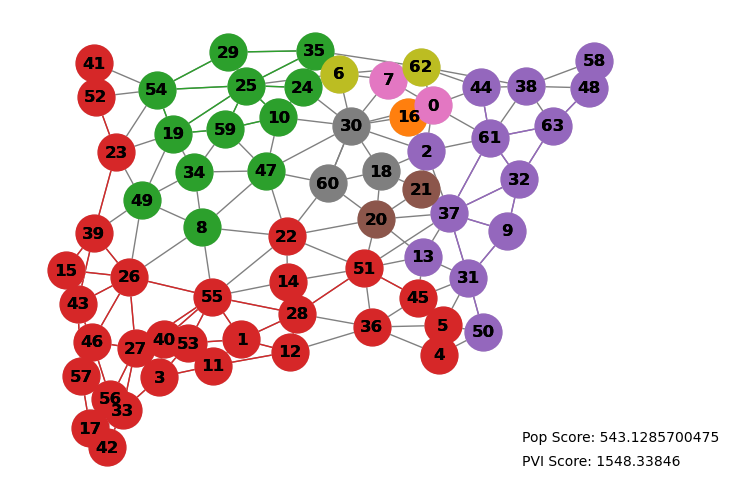

In [149]:
visualize_subgraphs3(graph1,subgraphs1)
are_subgraphs_nonempty(subgraphs1)

In [150]:
beta=0.05
import numpy as np

def get_a_valid_conflicted_edge_colorado(graph, subgraphs):
    conflicted_edge = get_random_edge_between_subgraphs(graph, subgraphs)
    
    while True:
        proposed_graph, proposed_subgraphs = create_proposed_state(graph, subgraphs, conflicted_edge)

        # Check if all proposed subgraphs are non-empty
        if are_subgraphs_nonempty(proposed_subgraphs):
            # Check if the proposed subgraph is connected
            if are_subgraphs_connected(proposed_graph, proposed_subgraphs):
                return  proposed_graph, proposed_subgraphs, conflicted_edge # Exit the loop if connected

        # If not connected, generate a different conflicted edge and try again
        conflicted_edge = get_random_edge_between_subgraphs(graph, subgraphs)

def Modified_one_iteration_of_MCMC_colorado(graph,subgraphs,proposed_graph, proposed_subgraphs):
    con1 = len(get_edges_between_subgraphs(graph, subgraphs))
    con2 = len(get_edges_between_subgraphs(proposed_graph, proposed_subgraphs))
    probfromscorefunctions = np.exp(-1 * beta * (totalscorefunction(proposed_graph, proposed_subgraphs) - totalscorefunction(graph, subgraphs))) 
    transitionprobability = min(1, con1 / con2, probfromscorefunctions)

    # Generate a random number between 0 and 1
    random_number = np.random.rand()

    # Check if the random number is less than the transition probability
    if random_number < transitionprobability:
        return proposed_graph, proposed_subgraphs
    else:
        return graph, subgraphs

In [151]:
import os

In [152]:
# Set the frames directory
frames_directory = r"C:\Users\nharr\OneDrive\Documents\ColoradoLambda1MCMC"
os.makedirs(frames_directory, exist_ok=True)

# Rest of your code remains unchanged
num_iterations = 100
graph1 = colorado_graph
subgraphs1 = colorado_subgraphs

for iteration in range(num_iterations):
    proposed_graph, proposed_subgraphs, conflicted_edge = get_a_valid_conflicted_edge_colorado(graph1, subgraphs1)
    if not are_subgraphs_connected(proposed_graph, proposed_subgraphs):
        print("PROBLEM")
        break
    visualize_subgraphs3(graph1, subgraphs1, conflicted_edge)

    # Save the first frame
    frame_filename = f"frame_{iteration * 2}.png"
    frame_path = os.path.join(frames_directory, frame_filename)
    plt.savefig(frame_path, format='png')
    plt.clf()

    graph1, subgraphs1 = Modified_one_iteration_of_MCMC_colorado(graph1, subgraphs1, proposed_graph, proposed_subgraphs)
    visualize_subgraphs3(graph1, subgraphs1)

    # Save the second frame
    frame_filename = f"frame_{iteration * 2 + 1}.png"
    frame_path = os.path.join(frames_directory, frame_filename)
    plt.savefig(frame_path, format='png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

442.3050734275
442.3050734275
1636.4526600000002
1804.51926


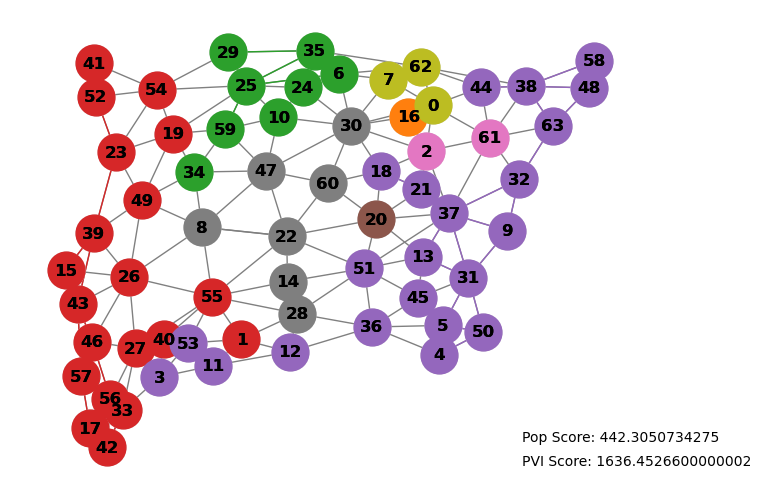

In [153]:
visualize_subgraphs3(graph1,subgraphs1)
print(populationscore(graph1,subgraphs1))
print(populationscore(graph1,subgraphs1))
print(PVIscore(graph1,subgraphs1))
print(PVIscore(colorado_graph,colorado_subgraphs))

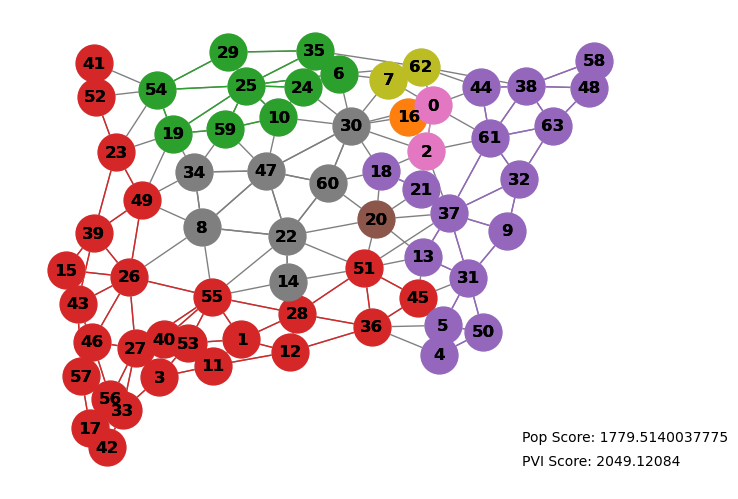

In [89]:
visualize_subgraphs3(colorado_graph,colorado_subgraphs)

In [154]:
import cv2
import os

# Path to the directory containing PNG frames
frames_directory = r"C:\Users\nharr\OneDrive\Documents\ColoradoLambda1MCMC"

# Output video file name
output_video_filename = r"C:\Users\nharr\OneDrive\Documents\colorado_lambda1_video.mp4"

# List all frame files in the directory and sort them based on the numeric part of the file name
frame_files = sorted([f for f in os.listdir(frames_directory) if f.endswith('.png')], key=lambda x: int(x.split('_')[1].split('.')[0]))

# Read the first frame to get dimensions
first_frame = cv2.imread(os.path.join(frames_directory, frame_files[0]))
height, width, _ = first_frame.shape

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use an appropriate codec (e.g., mp4v)
video_writer = cv2.VideoWriter(output_video_filename, fourcc, 4, (width, height))

# Write each frame to the video
for frame_file in frame_files:
    frame_path = os.path.join(frames_directory, frame_file)
    frame = cv2.imread(frame_path)
    video_writer.write(frame)

# Release the VideoWriter
video_writer.release()